In [1]:
import matplotlib.pyplot as plt

from starter_code import (
    ani1_config,
    load_ani1_data,
    calc_resid,
    create_heatmap,
    create_boxplot,
    filter_outliers,
    compute_rmse_by_num_heavy_atoms,
    plot_rmse_by_num_heavy_atoms,
    isin_tuple_series
)
import pandas as pd

In [2]:
molecules = load_ani1_data()

data file path is ./ANI-1ccx_clean_fullentry.h5


In [3]:
# Calculate the residual vector for each method-method combination
resid = calc_resid(molecules, as_dataframe=True)

Calculating residuals: 100%|██████████| 91/91 [00:10<00:00,  8.36it/s]


In [4]:
resid

(dt, cc)   (dt, hd)   (dt, hq)   (dt, ht)   (dt, md)  \
name   iconfig                                                         
C1H1N1 0        0.210292   3.895252   6.338880   6.038628  -3.379079   
       1       -0.164031   1.313996   2.529111   2.288905  -1.681865   
       2       -0.547859   5.325830   8.372329   7.981424  -5.588137   
       3       -2.295627   3.235866   5.178941   4.755790  -6.185670   
       4        1.590529   1.959811   2.243883   2.199664   2.363566   
...                  ...        ...        ...        ...        ...   
O3     55       1.026635  55.332439  55.316021  55.149633 -12.668730   
       56       2.757190  57.919829  58.122325  57.942421 -10.764872   
       57       1.579136  56.537497  56.611215  56.429623 -12.947936   
       58       3.808340  55.586173  55.511420  55.432642  -9.523247   
       59       1.048674  43.642224  42.534537  42.726212  -9.572418   

                (dt, mq)  (dt, mt)  (dt, nd)  (dt, nt)  (dt, pt)  ...  \
name   iconfig                                                    ...   
C1H1N1 0       -0.826979 -1.214402 -2.582477 -0.303195 -0.278982  ...   
       1       -1.055322 -1.268016 -0.760461 -0.376379 -0.250469  ...   
       2       -2.109511 -2.686200 -4.506608 -1.379871 -0.244022  ...   
       3       -4.372939 -4.954855 -4.450042 -3.128681 -0.142539  ...   
       4        1.591093  1.720621  2.580050  1.925877 -0.336385  ...   
...                  ...       ...       ...       ...       ...  ...   
O3     55      -8.314667 -9.554427 -5.397543 -1.212623  0.485020  ...   
       56      -6.469815 -7.710081 -3.836200  0.594565  0.402237  ...   
       57      -8.567648 -9.822326 -4.916526 -0.676409  0.457598  ...   
       58      -5.761431 -6.758334 -1.869311  2.047468  0.281973  ...   
       59      -6.709194 -7.209297 -3.056865 -0.061451  0.347780  ...   

                (wd, nt)  (wd, td)  (wd, wt)  (wt, cc)   (wt, md)   (wt, mq)  \
name   iconfig                                                                 
C1H1N1 0       -4.544621 -6.870643 -0.242335 -3.788799  -7.378170  -4.826071   
       1       -4.152205 -4.583022 -0.914852 -3.025005  -4.542839  -3.916297   
       2       -5.369839 -8.534516  0.244050 -4.781878  -9.822156  -6.343530   
       3       -5.697437 -7.045116  0.099933 -4.964316  -8.854358  -7.041628   
       4       -3.948931 -3.349792 -2.101022 -2.183257  -1.410219  -2.182692   
...                  ...       ...       ...       ...        ...        ...   
O3     55      -1.023922 -5.273323  7.358744 -6.143409 -19.838774 -15.484711   
       56      -1.046635 -5.610802  7.513897 -6.397907 -19.919969 -15.624912   
       57      -1.079797 -5.387334  7.453522 -6.277773 -20.804845 -16.424557   
       58       0.621591 -3.422161  7.242517 -4.860054 -18.191641 -14.429825   
       59       3.312132  0.331080  5.945621 -1.523364 -12.144456  -9.281233   

                 (wt, mt)   (wt, nd)  (wt, nt)   (wt, td)  
name   iconfig                                             
C1H1N1 0        -5.213494  -6.581569 -4.302287  -6.628309  
       1        -4.128990  -3.621435 -3.237353  -3.668169  
       2        -6.920219  -8.740626 -5.613890  -8.778566  
       3        -7.623543  -7.118731 -5.797370  -7.145048  
       4        -2.053165  -1.193736 -1.847908  -1.248770  
...                   ...        ...       ...        ...  
O3     55      -16.724471 -12.567587 -8.382667 -12.632068  
       56      -16.865178 -12.991297 -8.560532 -13.124699  
       57      -17.679235 -12.773435 -8.533318 -12.840856  
       58      -15.426727 -10.537704 -6.620926 -10.664677  
       59       -9.781335  -5.628903 -2.633489  -5.614541  

[232310 rows x 91 columns]

In [5]:
from typing import Union

from pandas import DataFrame, Series


def is_outlier(x: Union[DataFrame, Series], q_lower: float = 0.05, q_upper: float = 0.95) -> Union[DataFrame, Series]:
    return (x < x.quantile(q_lower)) | (x > x.quantile(q_upper))

This computes outlier status for all molecular configurations

In [6]:
is_outlier(resid)

(dt, cc)  (dt, hd)  (dt, hq)  (dt, ht)  (dt, md)  (dt, mq)  \
name   iconfig                                                               
C1H1N1 0           False     False     False     False     False     False   
       1           False     False     False     False     False     False   
       2           False     False     False     False     False     False   
       3           False     False     False     False     False     False   
       4           False     False     False     False     False     False   
...                  ...       ...       ...       ...       ...       ...   
O3     55          False      True      True      True     False     False   
       56          False      True      True      True     False     False   
       57          False      True      True      True     False     False   
       58          False      True      True      True     False     False   
       59          False      True      True      True     False     False   

                (dt, mt)  (dt, nd)  (dt, nt)  (dt, pt)  ...  (wd, nt)  \
name   iconfig                                          ...             
C1H1N1 0           False     False     False     False  ...     False   
       1           False     False     False     False  ...     False   
       2           False     False     False     False  ...     False   
       3           False     False     False     False  ...     False   
       4           False     False     False     False  ...     False   
...                  ...       ...       ...       ...  ...       ...   
O3     55          False     False     False     False  ...     False   
       56          False     False     False     False  ...     False   
       57          False     False     False     False  ...     False   
       58          False     False     False     False  ...     False   
       59          False     False     False     False  ...     False   

                (wd, td)  (wd, wt)  (wt, cc)  (wt, md)  (wt, mq)  (wt, mt)  \
name   iconfig                                                               
C1H1N1 0           False     False     False     False     False     False   
       1           False     False     False     False     False     False   
       2           False     False     False     False     False     False   
       3           False     False     False     False     False     False   
       4           False     False     False     False     False     False   
...                  ...       ...       ...       ...       ...       ...   
O3     55          False      True     False      True      True      True   
       56          False      True     False      True      True      True   
       57          False      True     False      True      True      True   
       58          False      True     False      True      True      True   
       59          False      True     False     False      True      True   

                (wt, nd)  (wt, nt)  (wt, td)  
name   iconfig                                
C1H1N1 0           False     False     False  
       1           False     False     False  
       2           False     False     False  
       3           False     False     False  
       4           False     False     False  
...                  ...       ...       ...  
O3     55          False     False     False  
       56          False     False     False  
       57          False     False     False  
       58          False     False     False  
       59          False     False     False  

[232310 rows x 91 columns]

In [7]:
# Frequency of outlier appearance for each molecular configuration
is_outlier(resid).sum(axis="columns")

name    iconfig
C1H1N1  0           0
        1           0
        2           0
        3           0
        4           0
                   ..
O3      55         46
        56         45
        57         47
        58         45
        59         44
Length: 232310, dtype: int64

In [8]:
is_outlier(resid).sum(axis="columns").rename("outliers")

name    iconfig
C1H1N1  0           0
        1           0
        2           0
        3           0
        4           0
                   ..
O3      55         46
        56         45
        57         47
        58         45
        59         44
Name: outliers, Length: 232310, dtype: int64

In [9]:
is_outlier(resid).sum(axis="columns").rename("outliers").reset_index()

,name,iconfig,outliers
0,C1H1N1,0,0
1,C1H1N1,1,0
2,C1H1N1,2,0
3,C1H1N1,3,0
4,C1H1N1,4,0
...,...,...,...
232305,O3,55,46
232306,O3,56,45
232307,O3,57,47
232308,O3,58,45


In [10]:
# Percentage of a molecule's configurations marked outliers, for each method-method combination
is_outlier(resid).groupby(level=[0]).mean()

,"(dt, cc)","(dt, hd)","(dt, hq)","(dt, ht)","(dt, md)","(dt, mq)","(dt, mt)","(dt, nd)","(dt, nt)","(dt, pt)",...,"(wd, nt)","(wd, td)","(wd, wt)","(wt, cc)","(wt, md)","(wt, mq)","(wt, mt)","(wt, nd)","(wt, nt)","(wt, td)"
name,,,,,,,,,,,,,,,,,,,,,
C1H1N1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1H1N1O1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1H1N3O1,0.097500,0.085000,0.080000,0.080000,0.005000,0.007500,0.007500,0.057500,0.075000,0.000000,...,0.007500,0.000000,0.182500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1H1N3O2,0.048295,0.036932,0.031250,0.031250,0.009943,0.014205,0.009943,0.052557,0.046875,0.000000,...,0.184659,0.068182,0.011364,0.156250,0.019886,0.102273,0.090909,0.014205,0.090909,0.011364
C1H1N3O3,0.818182,0.709091,0.636364,0.640909,0.818182,0.813636,0.804545,0.840909,0.827273,0.045455,...,0.150000,0.050000,0.209091,0.150000,0.081818,0.390909,0.272727,0.045455,0.072727,0.040909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H6O3,0.007692,0.023077,0.023077,0.023077,0.000000,0.007692,0.007692,0.000000,0.000000,0.976923,...,1.000000,0.753846,0.992308,0.446154,0.069231,1.000000,1.000000,0.000000,0.030769,0.000000
H8O4,0.019108,0.019108,0.019108,0.019108,0.248408,0.535032,0.464968,0.000000,0.006369,0.987261,...,1.000000,1.000000,1.000000,1.000000,0.484076,1.000000,1.000000,0.012739,0.089172,0.012739
N2,0.000000,0.000000,0.000000,0.000000,0.047945,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.239726,0.095890,0.212329,0.000000,0.000000,0.000000


In [11]:
# Percentage of a molecule's configurations marked outliers, for each method-method combination
is_outlier(resid).groupby(level=[0]).mean()

,"(dt, cc)","(dt, hd)","(dt, hq)","(dt, ht)","(dt, md)","(dt, mq)","(dt, mt)","(dt, nd)","(dt, nt)","(dt, pt)",...,"(wd, nt)","(wd, td)","(wd, wt)","(wt, cc)","(wt, md)","(wt, mq)","(wt, mt)","(wt, nd)","(wt, nt)","(wt, td)"
name,,,,,,,,,,,,,,,,,,,,,
C1H1N1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1H1N1O1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1H1N3O1,0.097500,0.085000,0.080000,0.080000,0.005000,0.007500,0.007500,0.057500,0.075000,0.000000,...,0.007500,0.000000,0.182500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1H1N3O2,0.048295,0.036932,0.031250,0.031250,0.009943,0.014205,0.009943,0.052557,0.046875,0.000000,...,0.184659,0.068182,0.011364,0.156250,0.019886,0.102273,0.090909,0.014205,0.090909,0.011364
C1H1N3O3,0.818182,0.709091,0.636364,0.640909,0.818182,0.813636,0.804545,0.840909,0.827273,0.045455,...,0.150000,0.050000,0.209091,0.150000,0.081818,0.390909,0.272727,0.045455,0.072727,0.040909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H6O3,0.007692,0.023077,0.023077,0.023077,0.000000,0.007692,0.007692,0.000000,0.000000,0.976923,...,1.000000,0.753846,0.992308,0.446154,0.069231,1.000000,1.000000,0.000000,0.030769,0.000000
H8O4,0.019108,0.019108,0.019108,0.019108,0.248408,0.535032,0.464968,0.000000,0.006369,0.987261,...,1.000000,1.000000,1.000000,1.000000,0.484076,1.000000,1.000000,0.012739,0.089172,0.012739
N2,0.000000,0.000000,0.000000,0.000000,0.047945,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.239726,0.095890,0.212329,0.000000,0.000000,0.000000


In [12]:
rmse_df = compute_rmse_by_num_heavy_atoms(molecules, resid, ani1_config["heavy_atoms"])


Computing RMSE: 100%|██████████| 91/91 [01:17<00:00,  1.17it/s]


In [151]:
rmse_df

,RMSE,RMSE / sqrt(nh),Heavy Atoms,Method Pair,STD,n
0,6.702626,6.702626,1,"(dt, cc)",6.580641,389
1,9.632126,6.810942,2,"(dt, cc)",9.436129,2782
2,11.065374,6.388596,3,"(dt, cc)",10.734641,3704
3,10.688764,5.344382,4,"(dt, cc)",10.662472,6188
4,13.471575,6.024671,5,"(dt, cc)",13.467539,21349
...,...,...,...,...,...,...
3,7.304118,3.652059,4,"(wt, td)",7.143432,6188
4,6.633740,2.966699,5,"(wt, td)",6.626947,21349
5,7.512538,3.066981,6,"(wt, td)",7.510977,42658
6,7.221819,2.729591,7,"(wt, td)",7.139695,38953


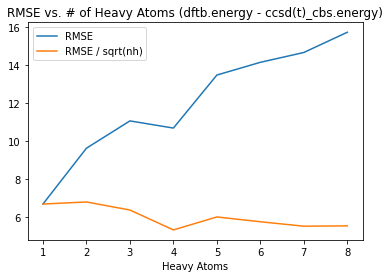

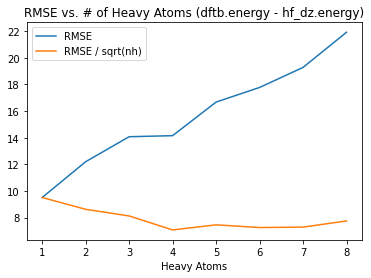

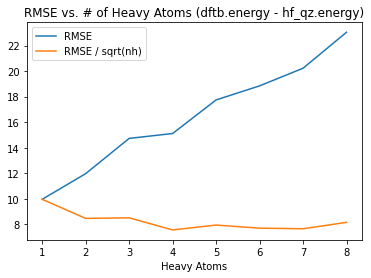

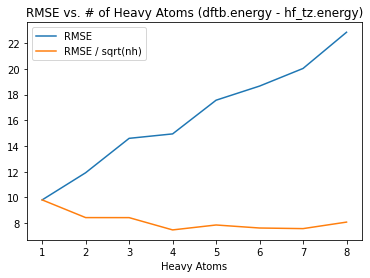

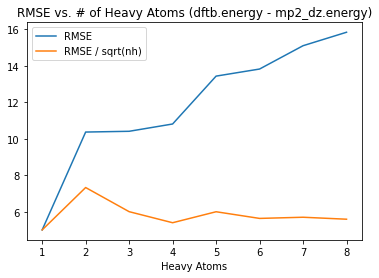

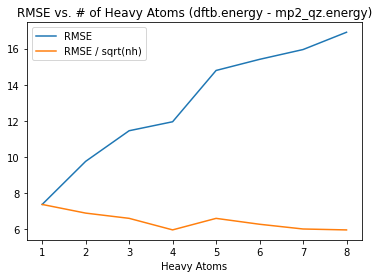

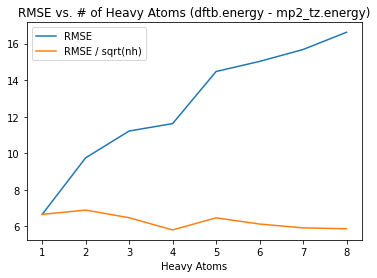

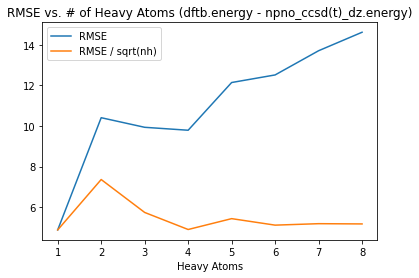

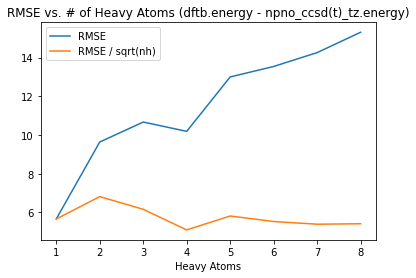

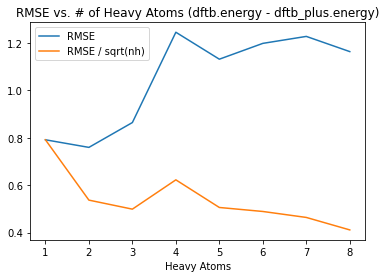

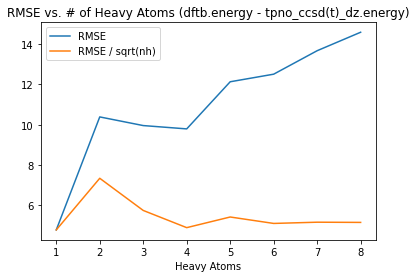

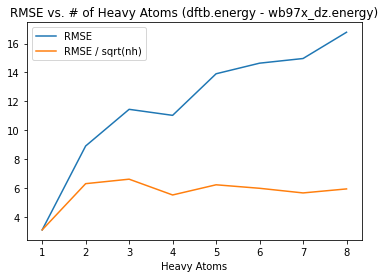

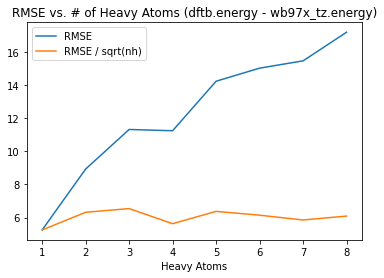

In [13]:

# Will produce 91 plots, one for each method-method combination
# plot_rmse_by_num_heavy_atoms(rmse_df)

# Will produce a plot for each dftb-method combination
plot_rmse_by_num_heavy_atoms(
    rmse_df[isin_tuple_series("dt", rmse_df["Method Pair"])],
    method_id_to_name=ani1_config["target"],
)


In [14]:
atom_types = {1: "H", 6: "C", 7: "N", 8: "O"}

def atomic_numbers_to_symbol(atomic_numbers):
    return [atom_types[number] for number in atomic_numbers]

In [15]:
from scipy.spatial.distance import cdist
import numpy as np

In [16]:
molecule = molecules[100622]

In [17]:
molecule["name"]

'C3H7N3O1'

In [18]:
molecule["atomic_numbers"]

array([6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 8], dtype=uint8)

In [144]:
molecule["iconfig"]

0

In [148]:
ATOM_PAIR_TO_BOND_ANGSTROM = {
    frozenset([1, 6]): (0.95, 1.70),
    frozenset([1, 7]): (0.95, 1.50),
    frozenset([1, 8]): (0.90, 1.50),
    frozenset([6, 6]): (1.00, 1.90),
    frozenset([6, 7]): (1.10, 1.80),
    frozenset([6, 8]): (1.10, 1.75),
}

def bonds_from_coordinates(coordinates, atomic_numbers):
    pairwise_distance = cdist(coordinates, coordinates)

    bonds = []
    # Loop through combinations of atoms in the molecule
    # Only need to look at one half of the (symmetric) pairwise distance matrix
    # And we don't care about the diagonal either
    for i, j in zip(*np.triu_indices_from(pairwise_distance, k=1)):
        atom_atom_distance = pairwise_distance[i, j]
        atomic_number_pair = frozenset([atomic_numbers[i], atomic_numbers[j]])
        bond_length_min_max = ATOM_PAIR_TO_BOND_ANGSTROM.get(atomic_number_pair)

        # If we have the current atom-atom pair in the bond length lookup table, 
        # check if the distance is within the allowed range
        if bond_length_min_max is not None:
            bond_length_min, bond_length_max = bond_length_min_max
            if bond_length_min < atom_atom_distance < bond_length_max:
                print(f"{atom_types[atomic_numbers[i]]}-{atom_types[atomic_numbers[j]]} bond")
                bonds.append((i, j))

    return bonds


In [149]:
# Toy example of distance matrix computation
coordinates = np.array(
    # x, y, z
    [[0, 0, 0],
     [0, 1, 0],
     [3**0.5, 3**0.5, 3**0.5]]
)

cdist(coordinates, coordinates)

array([[0.        , 1.        , 3.        ],
       [1.        , 0.        , 2.55654032],
       [3.        , 2.55654032, 0.        ]])

In [150]:
bonds = bonds_from_coordinates(molecule["coordinates"], molecule["atomic_numbers"])

C-H bond
C-H bond
C-H bond
C-N bond
C-H bond
C-N bond
C-N bond
C-N bond
C-N bond
C-O bond
H-N bond
H-N bond
H-N bond


In [107]:
print(bonds)

[(0, 10), (1, 10), (2, 10), (2, 12), (2, 13)]


In [133]:
from rdkit import Chem

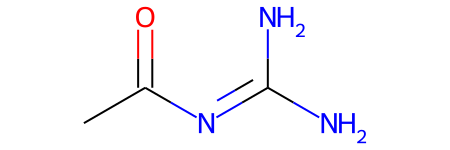

In [66]:
# N-(diaminomethylidene)acetamide -- Canonical SMILES
m = Chem.MolFromSmiles('CC(=O)N=C(N)N')
m

In [73]:
for bond in m.GetBonds():
    print(f"{bond.GetBeginAtom().GetSymbol()}-{bond.GetEndAtom().GetSymbol()} {bond.GetBondType()} bond")

C-C SINGLE bond
C-O DOUBLE bond
C-N SINGLE bond
N-C DOUBLE bond
C-N SINGLE bond
C-N SINGLE bond


Our bond detection seemed to have missed the C-C bond.

We should expect one of the carbon atom pairs in the distance matrix to have a pairwise distance roughly between 1.2 and 1.54. However, the distances between the carbon atoms are 2.44 and 2.49 from the ANI-1 data (see the first few entries in the table below).

In [140]:
# Printing the distance matrix
print("Atomic #:", "     ".join([str(x) for x in molecule["atomic_numbers"]]))
for row in cdist(molecule["coordinates"], molecule["coordinates"]):
    print("         ", "  ".join([f"{x:.2f}"for x in row]))

Atomic #: 6     6     6     1     1     1     1     1     1     1     7     7     7     8
          0.00  2.44  2.49  1.09  1.01  1.18  2.53  4.46  4.47  4.13  1.47  3.53  3.79  2.66
          2.44  0.00  2.44  3.41  2.32  2.99  1.22  2.04  4.03  2.71  1.40  1.26  2.91  3.51
          2.49  2.44  0.00  2.91  3.23  2.71  3.35  3.62  2.00  2.10  1.40  2.63  1.38  1.33
          1.09  3.41  2.91  0.00  1.79  1.72  3.60  5.36  4.75  4.66  2.26  4.39  4.25  2.75
          1.01  2.32  3.23  1.79  0.00  1.87  2.08  4.32  5.23  4.51  1.93  3.52  4.38  3.62
          1.18  2.99  2.71  1.72  1.87  0.00  2.88  4.94  4.50  4.57  2.05  4.05  4.01  2.45
          2.53  1.22  3.35  3.60  2.08  2.88  0.00  2.75  5.02  3.89  2.14  2.30  3.99  4.16
          4.46  2.04  3.62  5.36  4.32  4.94  2.75  0.00  4.36  2.49  3.19  1.03  3.22  4.88
          4.47  4.03  2.00  4.75  5.23  4.50  5.02  4.36  0.00  2.15  3.34  3.64  1.20  2.35
          4.13  2.71  2.10  4.66  4.51  4.57  3.89  2.49  2.15  0.00  2.6